# Explore here

In [1]:
# Your code here
# Do the train test split before substituting missing values with median and outliers, and before doing scaling
# Better to use pipelines even when using grid

Basic EDA

In [2]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head() # to show first 5 rows of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
import pandas as pd

print("Shape of DataFrame:", total_data.shape)

Shape of DataFrame: (1337, 5)


Drop duplicates:


In [20]:
total_data = total_data.drop_duplicates().reset_index(drop = True) 
#reset_index: default is False, when used with False 
#a new index column is added to the dataframe columns,
# we have to drop that (drop: True) so we do not have double row indexes shown
total_data.head()

,age,bmi,children,smoker_n,charges
0,0.108696,0.230024,0.0,1.0,0.020339
1,0.065217,0.263250,0.4,1.0,0.034446
2,0.739130,0.580172,0.4,1.0,0.516374
3,0.978261,0.686306,0.0,1.0,0.196070
4,0.630435,0.286252,0.4,1.0,0.137177


Min-Max scaler: shrink data usually between 0 and 1 (range)

Creating a Scaler:
First, we create a scaler object named scaler. Think of this scaler as a tool that helps us adjust the scale of our data.
Scaling the Features:
We use the scaler to transform the numerical variables in our dataset (total_data) to a specific scale. Scaling means adjusting the range of values in each column.
The fit_transform() method of the scaler adjusts the data based on the scaling method it applies. In this case, MinMaxScaler will transform the data so that all features are between 0 and 1.
Creating a New DataFrame:
We create a new DataFrame named total_data_scal to hold the scaled features.
The pd.DataFrame() function constructs a new DataFrame using the scaled features.
We provide the scaled features (scal_features) as the data, and we also specify the index and columns for the new DataFrame. The index is taken from the original total_data DataFrame, and the columns are named the same as the numerical variables.
Displaying the Head:
Finally, we display the first few rows of the total_data_scal DataFrame using the head() function. This helps us see how our scaled data looks like.
So, in simple terms, this code takes numerical variables from our dataset, adjusts their scale to be between 0 and 1, and then stores the scaled data in a new DataFrame called total_data_scal, which we can use for further analysis or modeling.

In [23]:
from sklearn.preprocessing import MinMaxScaler

total_data["sex_n"] = pd.factorize(total_data["sex"])[0] #turning categorical values into numerical ones
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0] 
#[0] because we want the first item in the tuple (generated by .factorize()), it contains the array of numerical lables
# Create numerical lables/assign unique number to the feature: sequence of numerical values given to each category in the array
# Male, female columns: male is assigned e.g. to label 0 and female to 1 (male and femal are contained in the array in the factorize.sex tuple)
# Each feature is in a specific category with a unique numerical lable
total_data["region_n"] = pd.factorize(total_data["region"])[0]
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]#list of numerical features/variables, old and new
#charges: target variable

scaler = MinMaxScaler() #helps us adjust the scale of the data
# numerical values of dataset are converted to a specific scale:
# numbers in each column are converted to numbers between 0 and 1
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
#index = total_data.index: keeping the columns above their values, keeping them in right format/shape
# Good practice!
total_data_scal.head()#create a new datafram with scaled features

KeyError: 'sex'

Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression #function
# f_regression: statistical technique, measures correlation between features and target variable
# for example: smoker feature has more of an impact (is strongly correlated to the charges)
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("charges", axis = 1) #drop target variable, keep features to use to make predictions
# X is the input features
y = total_data_scal["charges"] #output, what we want to obtain/predict, we need to see the original values of charges to the compare and see if the model was trained well

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #test_size = 20% of total data, 80% will be the training data
# random_state: each time the code is executed, it generates the same randomization - useful if someone else wants to use your code
# separate training data into X_train and y_train, test data also separated and then used to see how well the model works
total_data_correlated = SelectKBest(f_regression, k = 4) # k = 4: we only want to keep the top 4 features that are strongly correlated to the target variable
total_data_correlated.fit(X_train, y_train) #fit the SelectKBest model, to get the best feature

selected_features = X_train.columns[total_data_correlated.get_support()]
# X_train contains the features used to train the model. .get_support() returns an array to show which features
# were selected by the SelectKBest from before, that now are in X_train
X_train_correlated = pd.DataFrame(total_data_correlated.transform(X_train), columns = selected_features)
# pd.DataFrame: turn the array from .get_support() into a dataframe
# selecting features: include only selected features. .transform() putting correlated features into the dataframe
X_test_correlated = pd.DataFrame(total_data_correlated.transform(X_test), columns = selected_features)

X_train_correlated.head()

,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [ ]:
X_test_correlated.head() #some differences are good, we do not want the train data and test data to be exactly the same

,age,bmi,children,smoker_n
0,0.673913,0.176352,0.0,1.0
1,0.239130,0.259349,0.8,1.0
2,0.717391,0.549502,0.6,1.0
3,0.282609,0.495830,0.6,0.0
4,0.282609,0.603444,0.4,1.0


In [ ]:
X_train_correlated["charges"] = y_train.values
X_test_correlated["charges"] = y_test.values
X_train_correlated.to_csv("../data/processed/clean_train.csv", index = False)
X_test_correlated.to_csv("../data/processed/clean_test.csv", index = False) #to_csv: pandas method

# add the charges back into the data and save the two datasets in new csv files

Linear Regression Model

In [ ]:
#Load tidy csv files
train_data = pd.read_csv("../data/processed/clean_train.csv") #80% of total data
test_data = pd.read_csv("../data/processed/clean_test.csv") #20% of total data

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.108696,0.230024,0.0,1.0,0.020339
1,0.065217,0.263250,0.4,1.0,0.034446
2,0.739130,0.580172,0.4,1.0,0.516374
3,0.978261,0.686306,0.0,1.0,0.196070
4,0.630435,0.286252,0.4,1.0,0.137177


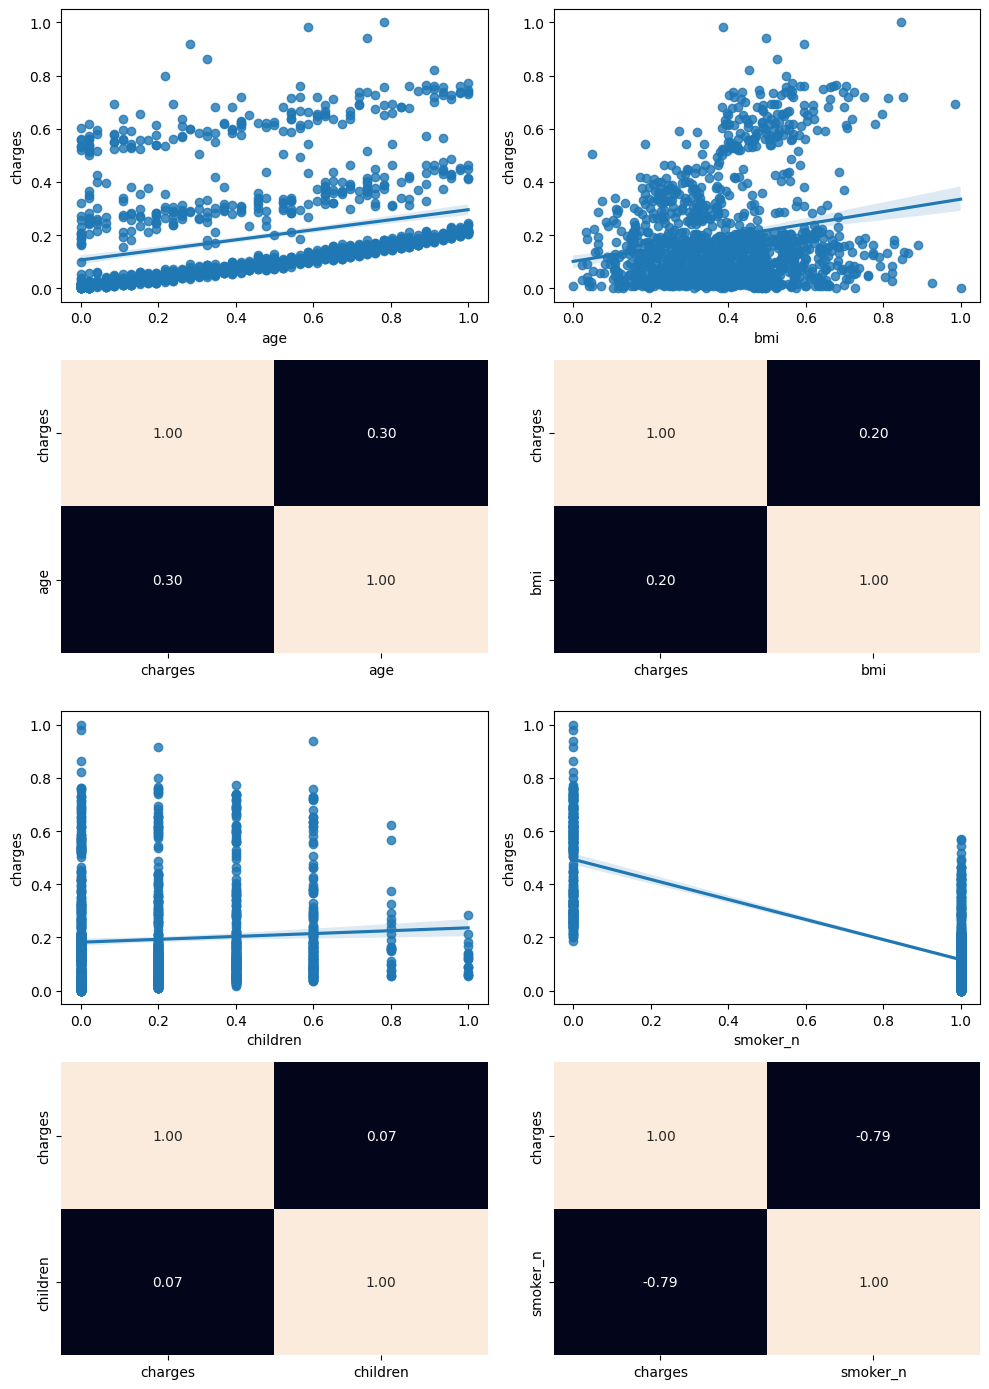

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
#creating figure and subplots (in this case 4 rows two columns)
total_data = pd.concat([train_data, test_data])
# this is creating a dataframe with all the (tidy) data back together
# to visualize all data when plotting
# plotting the total edaed data is useful to see what models we should apply,
# see if the data is good for a linear regression etc

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
# regplot creates scatterplot, we need to give the dataframe, x and y axis, where to create in in the figure/axis space
# heatmap: shows correlation between age and charges. Annot True: displayes the values of the correlation. Fmt: decimal numbers with 2 spaces after comma.
# cbar = False - for color. 1: age is correlating with itself so value high
# positive correlations (e.g. 0.30, between 0 and 1, the higher the stronger). If one variable increases the other does too.
# negative correlations: strong negative correlations: if one variable increases, the other variable decreases strongly.
# negative: inverse relationship - 

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [ ]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f"Intercept (a): {model.intercept_}") #Predicted value of target variable when all features are 0, maths of linear regression equation
print(f"Coefficients (b1, b2): {model.coef_}") #Represent effect on each independet variable in the linear regression equation
# For bigger data

Intercept (a): 0.319582718330895
Coefficients (b1, b2): [ 0.1829699   0.18111814  0.04293572 -0.36780589]


In [ ]:
y_pred = model.predict(X_test)
y_pred #Array: predicted charge for all instances/row in our array

array([ 0.10702315,  0.07685187,  0.2083241 ,  0.48685684,  0.12995459,
        0.19726353,  0.45755859,  0.00832554,  0.1556988 ,  0.16287349,
        0.14781084,  0.51037008,  0.4699569 ,  0.25944432,  0.14442757,
        0.13842465,  0.05134994,  0.49351746,  0.03848664,  0.0705325 ,
        0.04276279,  0.45855586,  0.22245537,  0.47182868,  0.47460549,
        0.06698449,  0.55116209,  0.5686984 ,  0.15588314,  0.20127518,
        0.0770878 ,  0.19051001, -0.00377298,  0.17967676,  0.61602286,
        0.18050297,  0.06028104,  0.0447116 ,  0.48287007,  0.13064786,
        0.08387671,  0.45610213,  0.54228697,  0.17124485,  0.09976616,
        0.03950023,  0.07028081,  0.12772953,  0.04874519,  0.13229562,
        0.09175793,  0.1653832 ,  0.47297483,  0.04437078,  0.16108797,
        0.14414371,  0.14902535,  0.02014774,  0.48426463,  0.13172362,
        0.2337337 ,  0.11691   ,  0.18103216,  0.00130779,  0.25281818,
        0.14612565,  0.14268127,  0.47671561,  0.38076578,  0.23

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}") #low good
print(f"R2 Score: {r2_score(y_test, y_pred)}") # high good
# no under or overfitting

MSE: 0.009150574110331992
R2 Score: 0.8045531086669289


In [ ]:
from sklearn.metrics import mean_absolute_error
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

MAE: 0.06701818856001629
RMSE: 0.09565863322425212
